In [1]:
library(Seurat)

In [2]:
trunk = new.env()
trunk$SR = readRDS("../data/Seurat/adrenal.mouse.seurat.rds")

In [4]:
trunk$SR@meta.data

,orig.ident,nCount_RNA,nFeature_RNA,RNA_snn_res.0.5,seurat_clusters
X70_AAACCCAAGAGGCTGT,X70,3188,1685,1,1
X70_AAACCCAAGGATGCGT,X70,3643,1751,3,3
X70_AAACCCAAGGCTATCT,X70,5272,2118,11,11
X70_AAACCCAAGGGCAACT,X70,7761,2829,7,7
X70_AAACCCACAACGCCCA,X70,6058,2222,6,6
X70_AAACCCACATAGAGGC,X70,1533,864,1,1
X70_AAACCCACATGACAAA,X70,3806,1777,1,1
X70_AAACCCAGTAGATCCT,X70,11742,3911,8,8
X70_AAACCCAGTCATCGGC,X70,2156,1215,9,9
X70_AAACCCAGTCCCGTGA,X70,5660,2274,0,0


# Whole trunk dataset

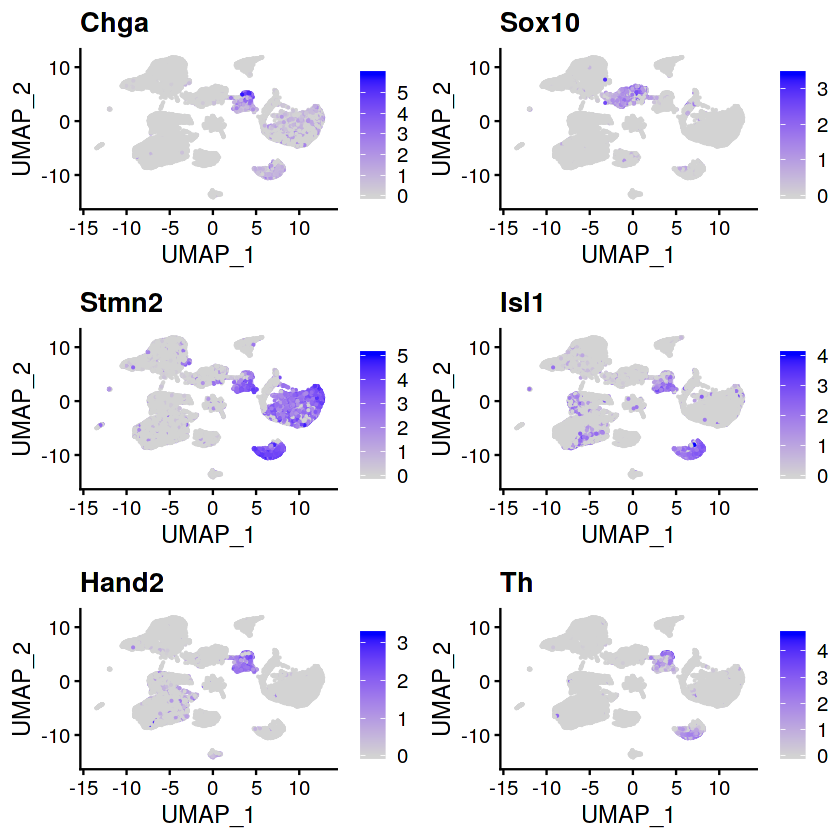

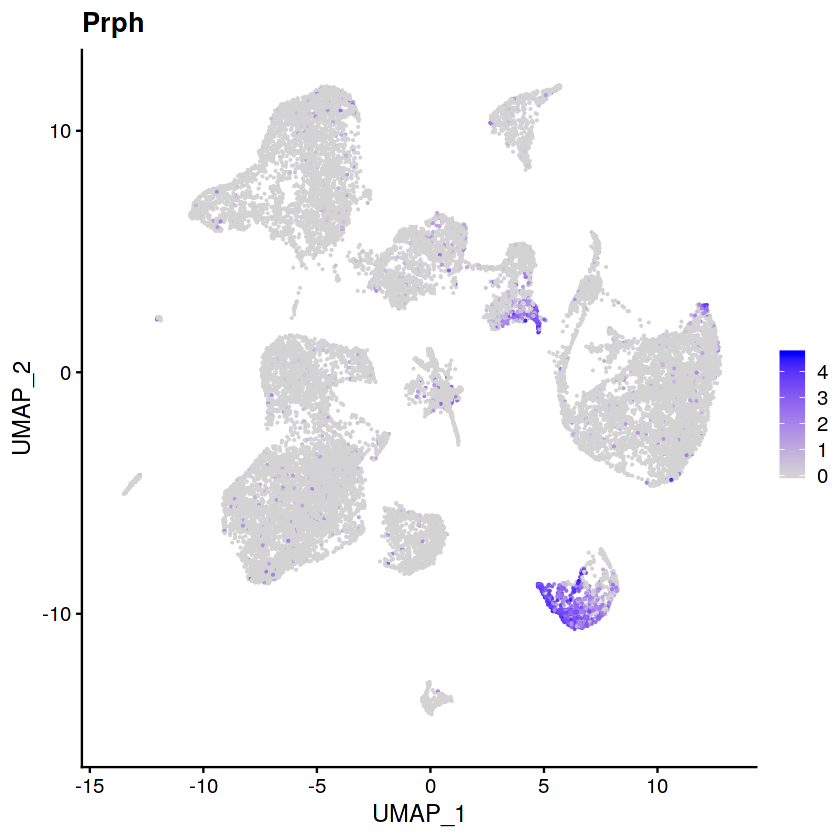

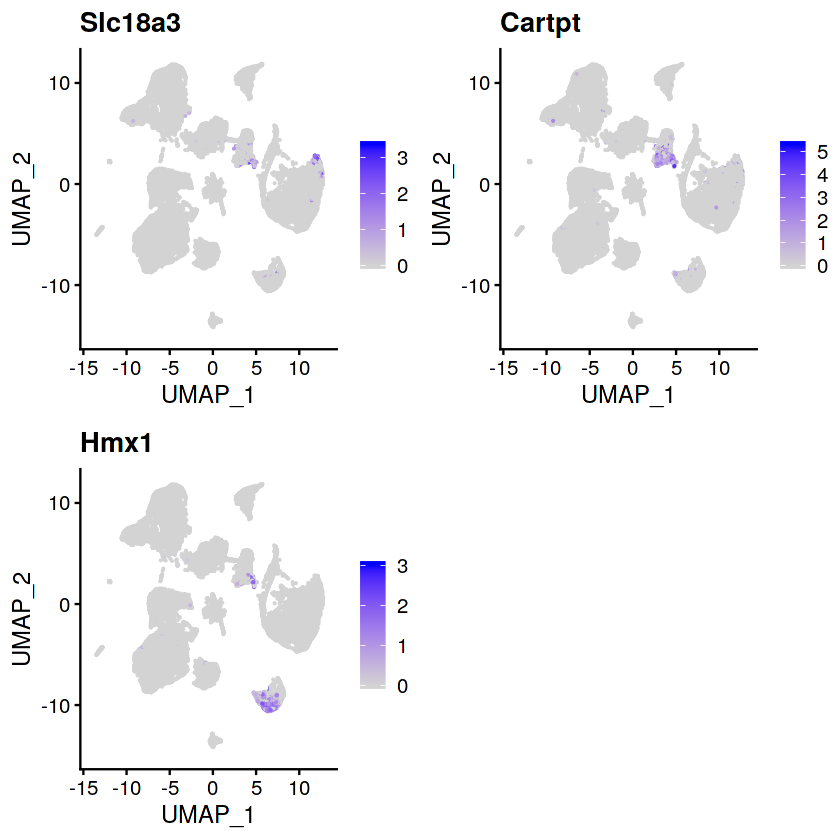

In [20]:
FeaturePlot(trunk$SR, c('Chga', 'Sox10', 'Stmn2', 'Isl1', 'Hand2', 'Th'), pt.size=0.1)

FeaturePlot(trunk$SR, c('Prph'), pt.size=0.1)
FeaturePlot(trunk$SR, c('Slc18a3', 'Cartpt', 'Hmx1'), pt.size=0.1)

Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 22715
Number of edges: 491200

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9755
Number of communities: 28
Elapsed time: 1 seconds


Warning message:
“Using `as.character()` on a quosure is deprecated as of rlang 0.3.0.
Please use `as_label()` or `as_name()` instead.
This warning is displayed once per session.”

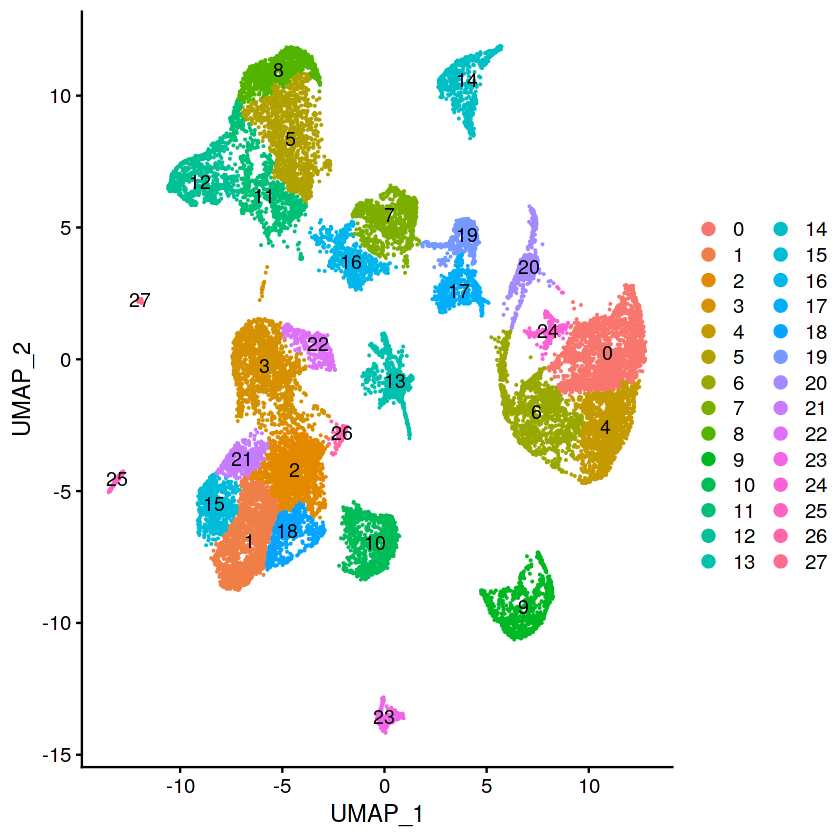

In [11]:
with(trunk, {
    SR <- FindNeighbors(SR, reduction = "umap", dims=1:2)
    SR <- FindClusters(SR, resolution = 0.3)
    plot(DimPlot(SR, reduction = "umap", label=T))
})

# Adrenal medulla

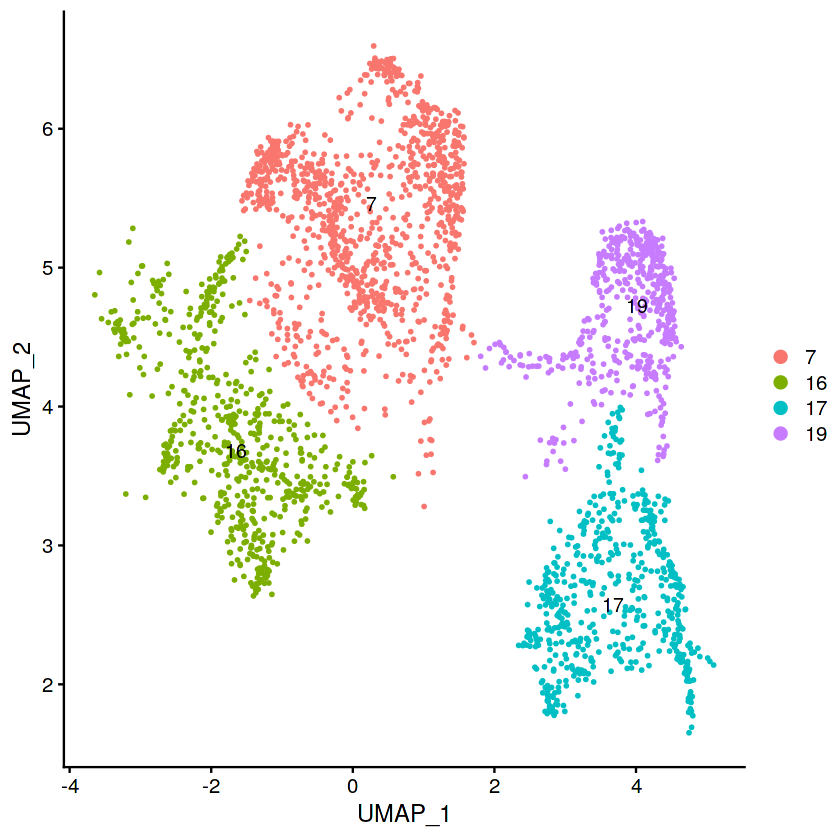

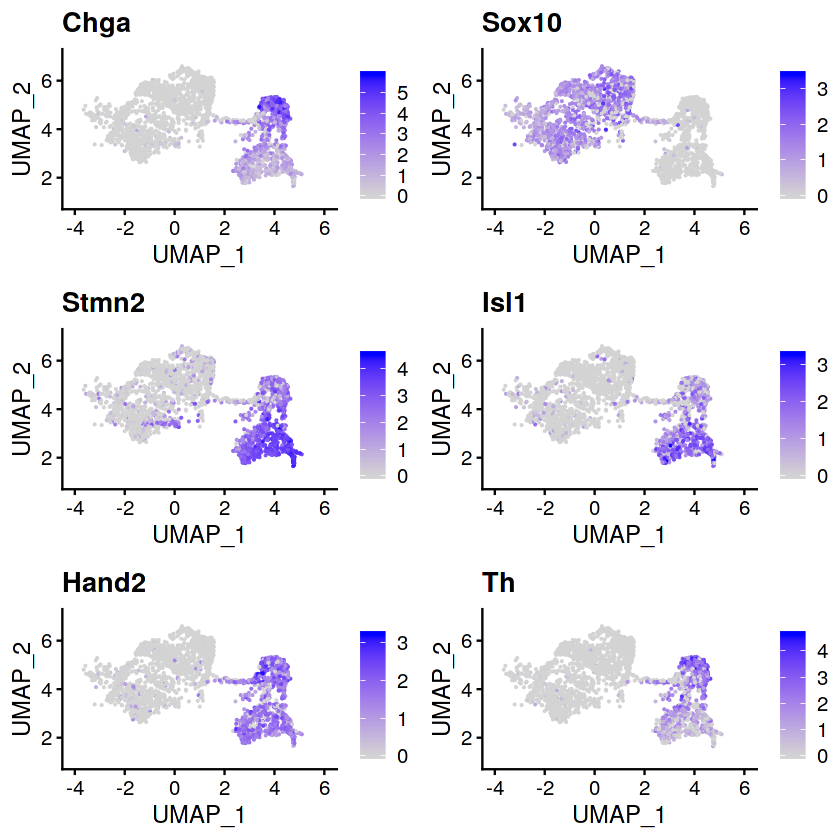

In [14]:
mouse_medulla = new.env()
mouse_medulla$SR = trunk$SR[,trunk$SR@meta.data$seurat_clusters %in% c(16,7,17,19) ]

plot(DimPlot(mouse_medulla$SR, reduction = "umap", label=T))
FeaturePlot(mouse_medulla$SR, c('Chga', 'Sox10', 'Stmn2', 'Isl1', 'Hand2', 'Th'), pt.size=0.1)

[1] "X70" "X71" "X72"

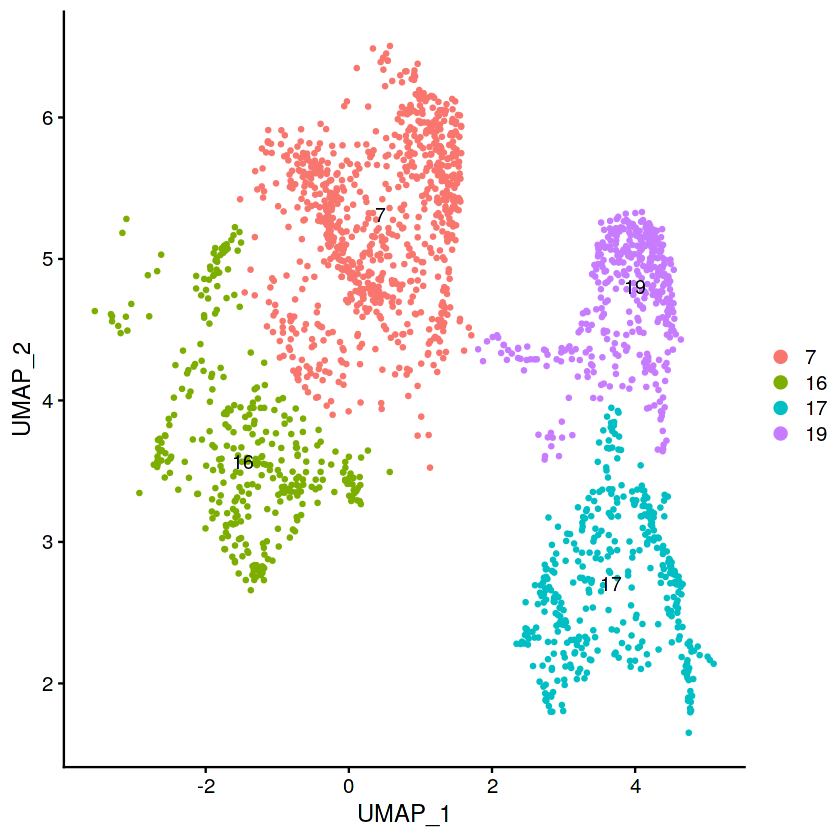

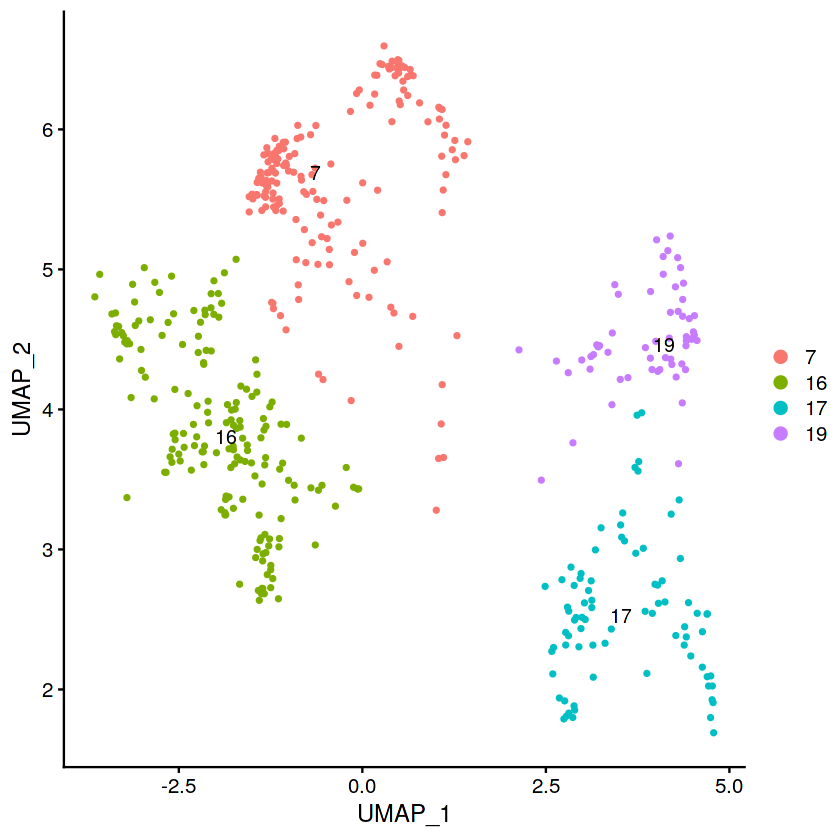

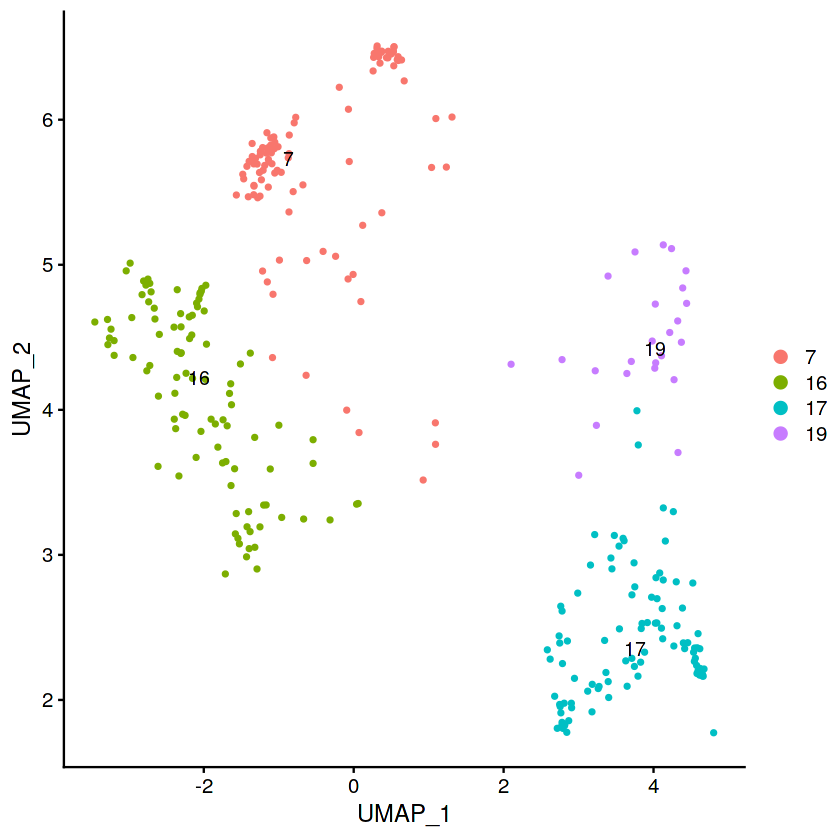

In [23]:
unique(mouse_medulla$SR@meta.data$orig.ident)
for(dataset in unique(mouse_medulla$SR@meta.data$orig.ident)){
    plot(DimPlot(mouse_medulla$SR[,mouse_medulla$SR@meta.data$orig.ident == dataset], reduction = "umap", label=T))
}


In [25]:
head(mouse_medulla$SR@reductions$umap@cell.embeddings)

,UMAP_1,UMAP_2
X70_AAAGAACCATTCGGGC,0.6707466,5.725276
X70_AAAGAACGTGAGTTTC,1.1627957,4.574903
X70_AAAGGGCCAATCGAAA,-0.7357856,4.473147
X70_AAAGGTACAGCTGTAT,1.3653375,4.789459
X70_AAAGTGACAAGATCCT,0.7451112,5.215788
X70_AAATGGATCTGAGGCC,0.6912547,5.508286


In [ ]:
write.csv(mouse_medulla$SR@reductions$umap@cell.embeddings, 
          file='../data/embeddings/mouse_medulla.csv')

# Export plots

## Medulla

In [39]:
library(ggplot2)
library(dplyr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [36]:
dir.create('figures/fig2_medulla/')

merkers_txt = 'Phox2b
Ascl1
Th
Pnmt
Sox10
Plp1
Foxd3
Prph
Stmn2
Isl1
Chga
Penk
Htr3a
Elavl3
Elavl4
Erbb3
S100b
Ngfr
Hand2
Hmx1
Prph
Mki67
Penk
Cartpt'

markers_fig1 = strsplit(merkers_txt, '\n')[[1]] #toupper(strsplit(merkers_txt, '\n')[[1]])
markers_fig1

for(marker in markers_fig1){
    print(marker)
    FeaturePlot(mouse_medulla$SR, feature=marker, cols = c("lightgrey", "darkred")) +NoLegend() #pt.size = 0.1,
    ggsave(paste0('figures/fig2_medulla/005.adrenal_mouse_medulla.marker.',marker,'.png'), width=5, height=5, dpi=320)
}

[1] "Phox2b" "Ascl1"  "Th"     "Pnmt"   "Sox10"  "Plp1"   "Foxd3"  "Prph"  
 [9] "Stmn2"  "Isl1"   "Chga"   "Penk"   "Htr3a"  "Elavl3" "Elavl4" "Erbb3" 
[17] "S100b"  "Ngfr"   "Hand2"  "Hmx1"   "Prph"   "Mki67"  "Penk"   "Cartpt"

[1] "Phox2b"
[1] "Ascl1"
[1] "Th"
[1] "Pnmt"
[1] "Sox10"
[1] "Plp1"
[1] "Foxd3"
[1] "Prph"
[1] "Stmn2"
[1] "Isl1"
[1] "Chga"
[1] "Penk"
[1] "Htr3a"
[1] "Elavl3"
[1] "Elavl4"
[1] "Erbb3"
[1] "S100b"
[1] "Ngfr"
[1] "Hand2"
[1] "Hmx1"
[1] "Prph"
[1] "Mki67"
[1] "Penk"
[1] "Cartpt"


# Markers - clusters in mouse medulla

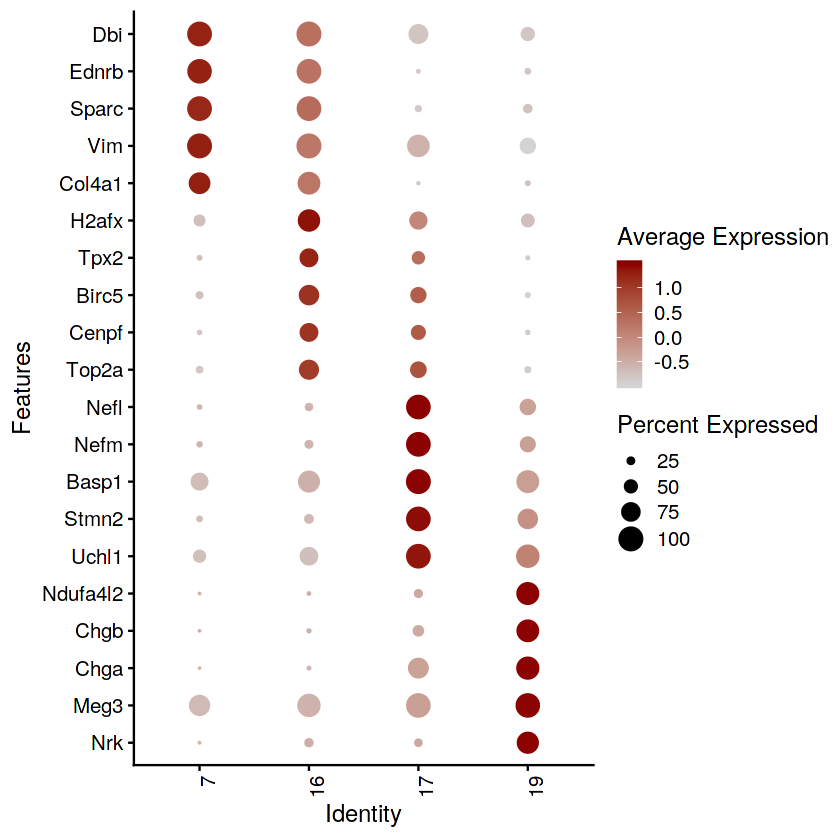

In [45]:
with(mouse_medulla, {

    SR.markers.AUC <- FindAllMarkers(SR, only.pos = TRUE, min.pct = 0.25, logfc.threshold = 0.25,
                                    test='roc'
                                    )
    
    top5 <- SR.markers.AUC %>% group_by(cluster) %>% top_n(n = 5, wt = myAUC)
})
#DotPlot(env_6tp$SR, features = env_6tp$top10.AUC$gene, group.by='fate')
DotPlot(mouse_medulla$SR, features = unique(mouse_medulla$top5$gene), group.by='seurat_clusters', cols = c("lightgrey", "darkred"))+
         coord_flip()+theme(axis.text.x = element_text(angle = 90, hjust = 1))
ggsave('figures/fig2_medulla/dotplot_medulla_mouse_clusters.top5pv.pdf', width=5,height=7)

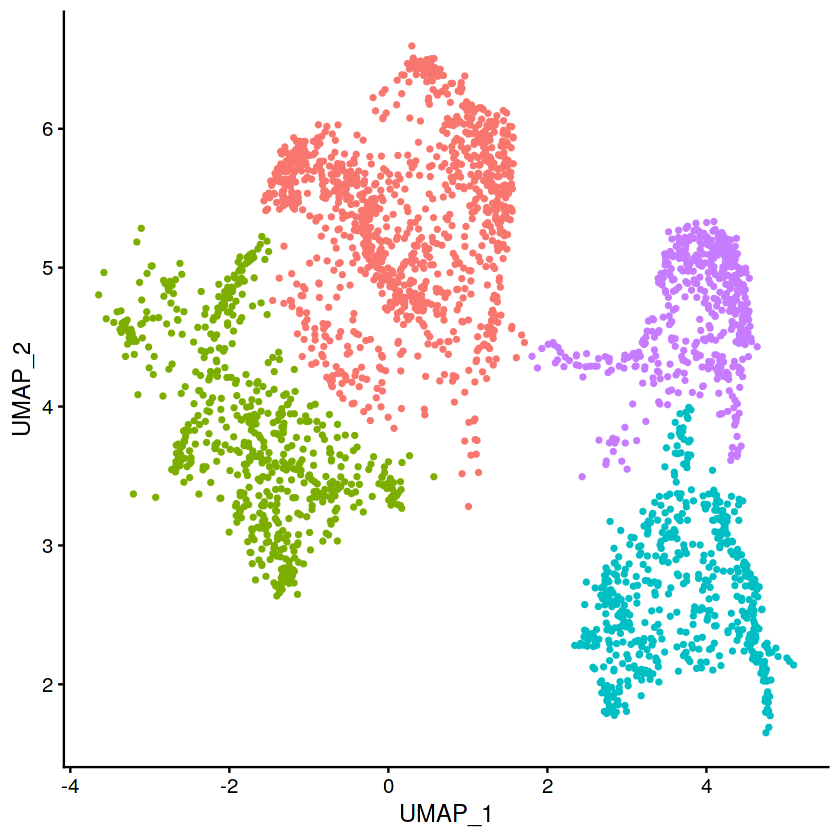

In [117]:
DimPlot(mouse_medulla$SR, reduction = "umap", group.by = 'seurat_clusters', pt.size=1, label=F) + NoLegend()
ggsave('figures/fig2_medulla/006.adrenal_mouse.clusters.pt1.3x3.png', width=3, height=3, dpi=320)

In [51]:
library(monocle3)
library(igraph)

Loading required package: Biobase
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from ‘package:dplyr’:

    combine, intersect, setdiff, union

The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colMeans,
    colnames, colSums, dirname, do.call, duplicated, eval, evalq,
    Filter, Find, get, grep, grepl, intersect, is.unsorted, lapply,
    lengths, Map, mapply, match, mget, order, paste, pmax, pmax.int,
    pmin, pmin.int, Position, rank, rbind, Reduce, rowMeans, rownames,
    rowSums, sapply, setdiff, sort, table

# Trajectories

## bridge 1

In [52]:
gene_annotation = mouse_medulla$SR@assays$RNA@meta.features
gene_annotation$gene_short_name = rownames(gene_annotation)

cds <- new_cell_data_set(mouse_medulla$SR@assays$RNA@counts,
                         cell_metadata = mouse_medulla$SR@meta.data,
                         gene_metadata = gene_annotation)
cds <- preprocess_cds(cds, num_dim = 100)

In [54]:
UMAP = mouse_medulla$SR@reductions$umap@cell.embeddings
cds@reducedDims$UMAP = UMAP

cds <- cluster_cells(cds)

  |======================================================================| 100%


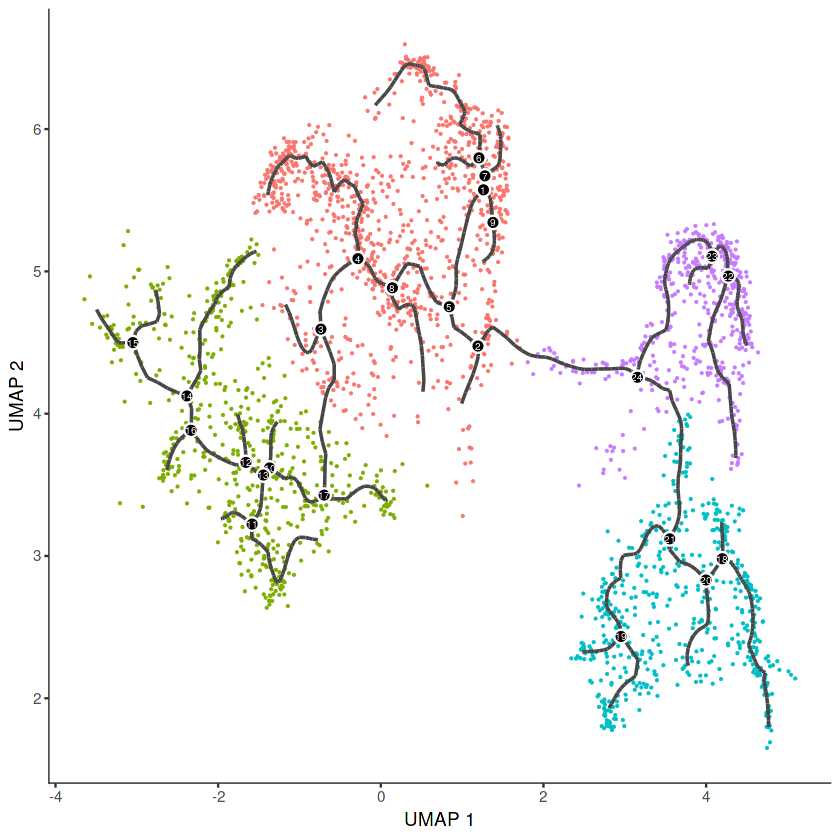

In [57]:
colData(cds)$fate_medulla = factor(mouse_medulla$SR@meta.data$seurat_cluster)
cds <- learn_graph(cds, use_partition = T)


plot_cells(cds,
           color_cells_by = "fate_medulla",
           label_groups_by_cluster=FALSE,
           label_leaves=FALSE,
           label_branch_points=T,
          cell_size = 0.5,
          label_cell_groups=F)+NoLegend()


In [ ]:
cds <- learn_graph(cds, use_partition = T)
plot_cells(cds,
           #color_cells_by = "cell.type",
           label_groups_by_cluster=FALSE,
           label_leaves=FALSE,
           label_branch_points=T)

+ 830/830 vertices, named, from b3a03e3:
  [1] Y_1   Y_2   Y_3   Y_4   Y_5   Y_6   Y_7   Y_8   Y_9   Y_10  Y_11  Y_12 
 [13] Y_13  Y_14  Y_15  Y_16  Y_17  Y_18  Y_19  Y_20  Y_21  Y_22  Y_23  Y_24 
 [25] Y_25  Y_26  Y_27  Y_28  Y_29  Y_30  Y_31  Y_32  Y_33  Y_34  Y_35  Y_36 
 [37] Y_37  Y_38  Y_39  Y_40  Y_41  Y_42  Y_43  Y_44  Y_45  Y_46  Y_47  Y_48 
 [49] Y_49  Y_50  Y_51  Y_52  Y_53  Y_54  Y_55  Y_56  Y_57  Y_58  Y_59  Y_60 
 [61] Y_61  Y_62  Y_63  Y_64  Y_65  Y_66  Y_67  Y_68  Y_69  Y_70  Y_71  Y_72 
 [73] Y_73  Y_74  Y_75  Y_76  Y_77  Y_78  Y_79  Y_80  Y_81  Y_82  Y_83  Y_84 
 [85] Y_85  Y_86  Y_87  Y_88  Y_89  Y_90  Y_91  Y_92  Y_93  Y_94  Y_95  Y_96 
 [97] Y_97  Y_98  Y_99  Y_100 Y_101 Y_102 Y_103 Y_104 Y_105 Y_106 Y_107 Y_108
[109] Y_109 Y_110 Y_111 Y_112 Y_113 Y_114 Y_115 Y_116 Y_117 Y_118 Y_119 Y_120
+ ... omitted several vertices

Warning message in subgraph(cds@principal_graph$UMAP, all_simple_paths(cds@principal_graph$UMAP, :
“At structural_properties.c:1945 :igraph_subgraph is deprecated from igraph 0.6, use igraph_induced_subgraph instead”

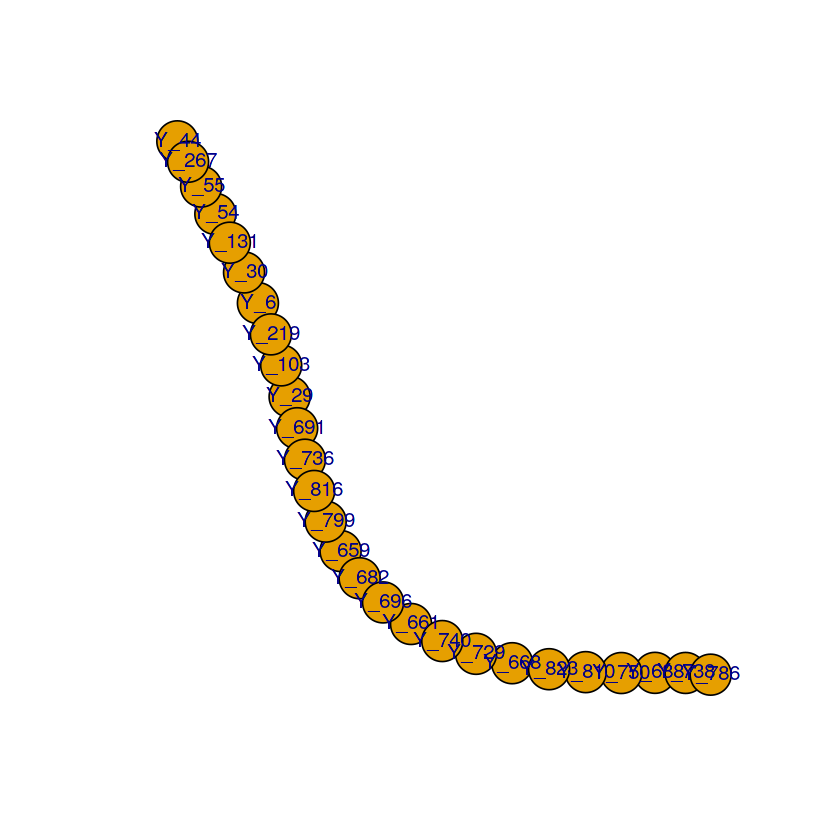

In [90]:
branchnodes = monocle3:::branch_nodes(cds)
y0 = names(branchnodes)[2]
y1 =names(branchnodes)[24]

V(cds@principal_graph$UMAP)
path = subgraph(cds@principal_graph$UMAP, all_simple_paths(cds@principal_graph$UMAP, y0, y1)[[1]])
plot(path)

In [91]:
closest_vertex <-
    paste0('Y_', cds@principal_graph_aux$UMAP$pr_graph_cell_proj_closest_vertex)

range(closest_vertex)
V(path)

cds_sel = cds[,closest_vertex %in% names(V(path))]
cds_sel

[1] "Y_1"  "Y_99"

+ 27/27 vertices, named, from eecdb44:
 [1] Y_6   Y_29  Y_30  Y_44  Y_54  Y_55  Y_103 Y_131 Y_219 Y_267 Y_659 Y_661
[13] Y_668 Y_682 Y_688 Y_691 Y_696 Y_729 Y_736 Y_738 Y_740 Y_750 Y_786 Y_799
[25] Y_810 Y_816 Y_823

class: cell_data_set 
dim: 19330 82 
metadata(1): cds_version
assays(1): counts
rownames(19330): Xkr4 Sox17 ... Gm19557 Vmn2r122
rowData names(6): vst.mean vst.variance ... vst.variable
  gene_short_name
colnames(82): X70_AAAGGTACAGCTGTAT X70_AAGACAATCCCGAGGT ...
  X72_ATCACTTAGGGACCAT X72_TTAGTCTAGGCACCAA
colData names(10): orig.ident nCount_RNA ... Size_Factor fate_medulla
reducedDimNames(2): PCA UMAP
spikeNames(0):

[1] "Y_44"

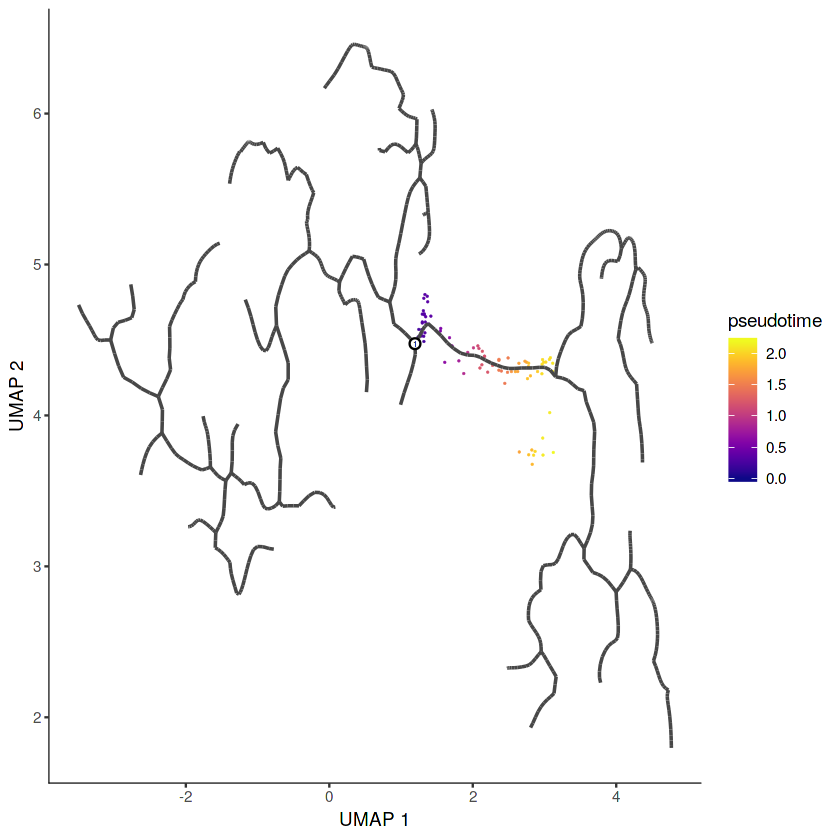

In [92]:
y0
cds_sel_pt = order_cells(cds_sel, reduction_method = 'UMAP', root_pr_nodes = y0)
plot_cells(cds_sel_pt,
           color_cells_by = "pseudotime",
           label_cell_groups=FALSE,
           label_leaves=FALSE,
           label_branch_points=FALSE,
           graph_label_size=1.5)


In [63]:
pr_test_res <- graph_test(cds_sel_pt, neighbor_graph="principal_graph", cores=1)
pr_deg_ids <- row.names(subset(pr_test_res, q_value < 0.05))

  |=======================================================| 100%, Elapsed 00:41


In [75]:
pr_deg_ids <- row.names(subset(pr_test_res, q_value < 10^-10 & vst.variance>1 )) #vst.variance.expected>1
pr_deg_ids = pr_deg_ids[!startsWith(pr_deg_ids, "Hb")]
length(pr_deg_ids)
pr_deg_ids

[1] 28

[1] "Zdbf2"   "Vim"     "Nop10"   "Scg5"    "Ddx27"   "Adrm1"   "Nsg1"   
 [8] "Phox2b"  "Parm1"   "Gtf2i"   "Tlx2"    "Ucp2"    "Phox2a"  "Cdkn1c" 
[15] "Cd24a"   "Pcbp3"   "Syt1"    "Hand2"   "Tsc22d1" "Ednrb"   "Impdh2" 
[22] "Nme1"    "Rbm24"   "Map1b"   "Gap43"   "Calm2"   "Cxxc5"   "Dpysl3"

In [95]:
pr_deg_ids = c('Sox10', 'Plp1', 
               'Ngfr',
                'S100b',  'Hand2',   
               'Chga', 'Penk', 'Th')

In [96]:
library(gplots)

cds_subset = cds_sel_pt[pr_deg_ids,]
colData(cds_subset)$pseudotime = pseudotime(cds_subset)

trend_formula='~ splines::ns(pseudotime, df=3)'
new_data <- data.frame(pseudotime = colData(cds_subset)$pseudotime)

model_tbl = fit_models(cds_subset, model_formula_str = trend_formula)

model_expectation <- model_predictions(model_tbl,
                                         new_data = colData(cds_subset))

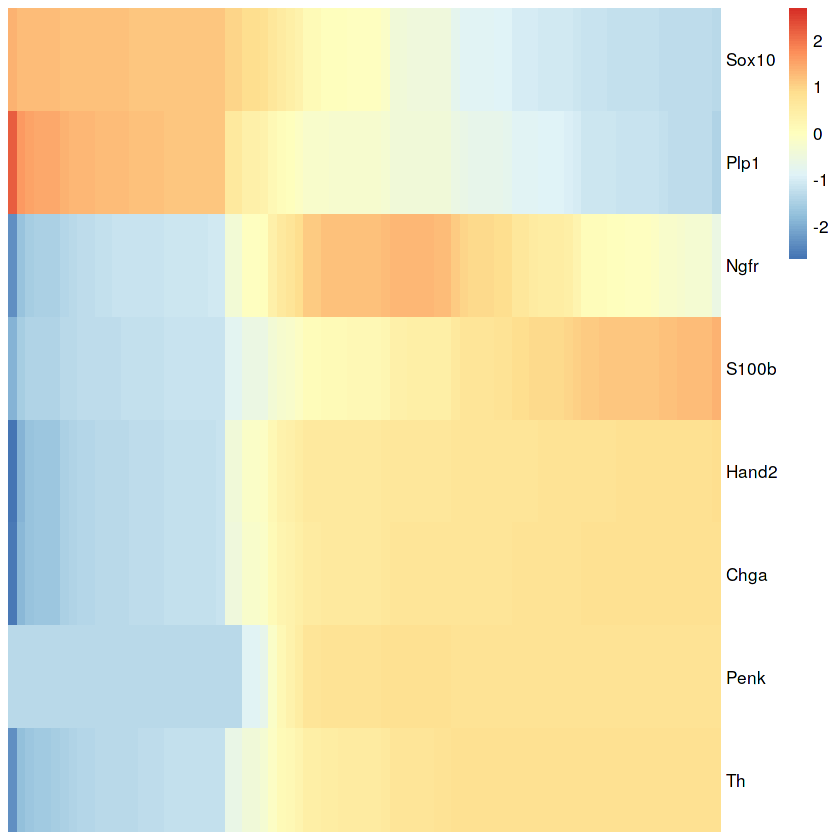

In [97]:
library(pheatmap)
library(viridis)
library(ggplot2)
heatmap_matrix = na.omit(log10(as.matrix(model_expectation))[,order(colData(cds_subset)$pseudotime)])
#heatmap_matrix=heatmap_matrix[rownames(heatmap_matrix)!='ATP5F1E',]
#pdf('heatmap_trajectory.medulla2c.1.pdf')
ph <- pheatmap(heatmap_matrix, 
                 useRaster = T,
                 cluster_cols=FALSE, 
                 cluster_rows=F, 
                 show_rownames=T, 
                 show_colnames=F, 
                 #clustering_distance_rows=row_dist,
                 #clustering_method = ,
                 #cutree_rows=num_clusters,
                 silent=F,
                 filename=NA,
                 #breaks=bks,
                 border_color = NA,
                 #color=hmcols
               scale='row'#,
               #color=viridis(100)
              )

In [99]:
save_pheatmap_pdf <- function(x, filename, width=7, height=7) {
   stopifnot(!missing(x))
   stopifnot(!missing(filename))
   pdf(filename, width=width, height=height)
   grid::grid.newpage()
   grid::grid.draw(x$gtable)
   dev.off()
}
save_pheatmap_pdf(ph, "figures/fig2_medulla/heatmap_trajectory.mouse.medulla.bridge1.pdf", 5, 5)

png 
  2

## bridge 2 - mouse

+ 830/830 vertices, named, from b3a03e3:
  [1] Y_1   Y_2   Y_3   Y_4   Y_5   Y_6   Y_7   Y_8   Y_9   Y_10  Y_11  Y_12 
 [13] Y_13  Y_14  Y_15  Y_16  Y_17  Y_18  Y_19  Y_20  Y_21  Y_22  Y_23  Y_24 
 [25] Y_25  Y_26  Y_27  Y_28  Y_29  Y_30  Y_31  Y_32  Y_33  Y_34  Y_35  Y_36 
 [37] Y_37  Y_38  Y_39  Y_40  Y_41  Y_42  Y_43  Y_44  Y_45  Y_46  Y_47  Y_48 
 [49] Y_49  Y_50  Y_51  Y_52  Y_53  Y_54  Y_55  Y_56  Y_57  Y_58  Y_59  Y_60 
 [61] Y_61  Y_62  Y_63  Y_64  Y_65  Y_66  Y_67  Y_68  Y_69  Y_70  Y_71  Y_72 
 [73] Y_73  Y_74  Y_75  Y_76  Y_77  Y_78  Y_79  Y_80  Y_81  Y_82  Y_83  Y_84 
 [85] Y_85  Y_86  Y_87  Y_88  Y_89  Y_90  Y_91  Y_92  Y_93  Y_94  Y_95  Y_96 
 [97] Y_97  Y_98  Y_99  Y_100 Y_101 Y_102 Y_103 Y_104 Y_105 Y_106 Y_107 Y_108
[109] Y_109 Y_110 Y_111 Y_112 Y_113 Y_114 Y_115 Y_116 Y_117 Y_118 Y_119 Y_120
+ ... omitted several vertices

Warning message in subgraph(cds@principal_graph$UMAP, all_simple_paths(cds@principal_graph$UMAP, :
“At structural_properties.c:1945 :igraph_subgraph is deprecated from igraph 0.6, use igraph_induced_subgraph instead”

[1] "Y_1"  "Y_99"

+ 23/23 vertices, named, from a11c3c1:
 [1] Y_493 Y_498 Y_503 Y_511 Y_543 Y_556 Y_577 Y_578 Y_583 Y_596 Y_601 Y_606
[13] Y_618 Y_640 Y_653 Y_660 Y_765 Y_772 Y_783 Y_786 Y_801 Y_821 Y_827

class: cell_data_set 
dim: 19330 83 
metadata(1): cds_version
assays(1): counts
rownames(19330): Xkr4 Sox17 ... Gm19557 Vmn2r122
rowData names(6): vst.mean vst.variance ... vst.variable
  gene_short_name
colnames(83): X70_AAACGAATCCTCACCA X70_AAGACAATCGGTCATA ...
  X72_TACTGCCTCTATCCAT X72_TTCGCTGCACAAGGTG
colData names(10): orig.ident nCount_RNA ... Size_Factor fate_medulla
reducedDimNames(2): PCA UMAP
spikeNames(0):

[1] "Y_786"

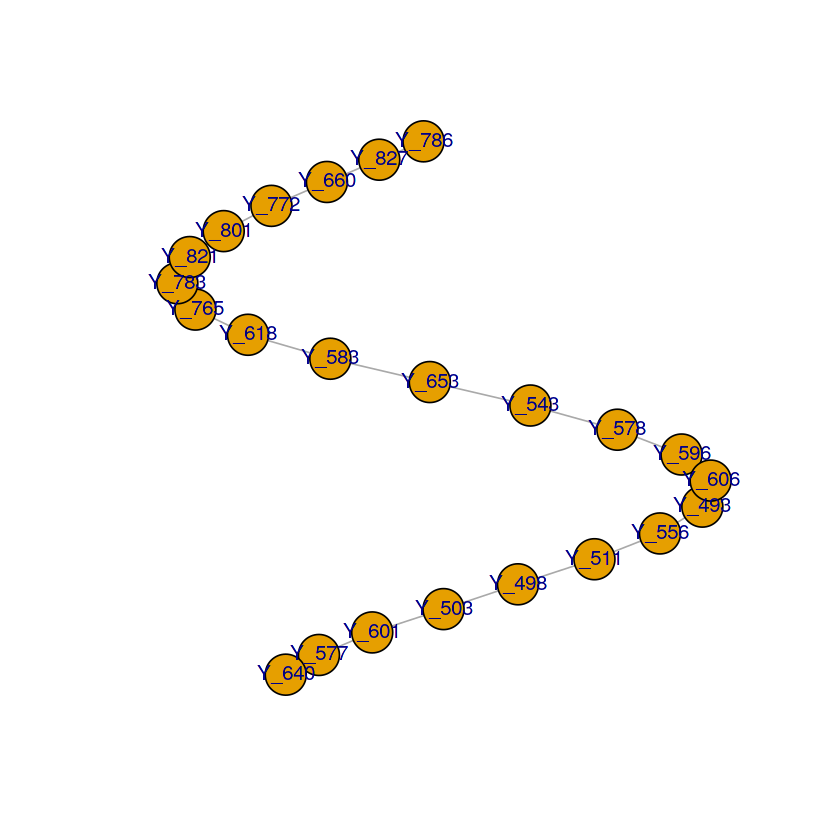

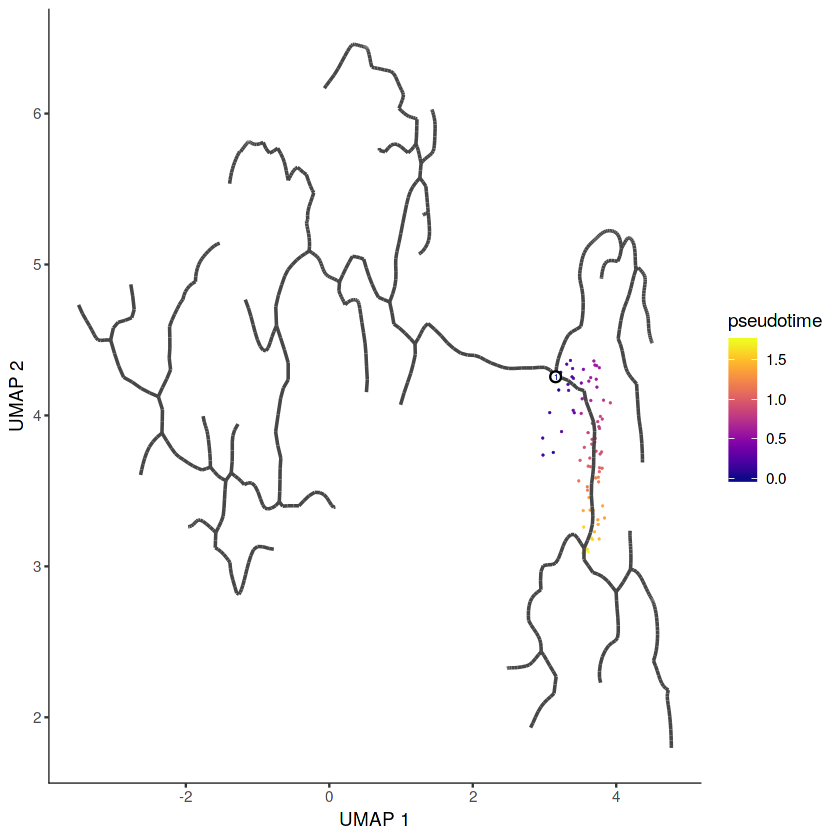

In [100]:
branchnodes = monocle3:::branch_nodes(cds)

y0 = names(branchnodes)[24]
y1 =names(branchnodes)[21]

V(cds@principal_graph$UMAP)
path = subgraph(cds@principal_graph$UMAP, all_simple_paths(cds@principal_graph$UMAP, y0, y1)[[1]])
plot(path)


closest_vertex <-
    paste0('Y_', cds@principal_graph_aux$UMAP$pr_graph_cell_proj_closest_vertex)

range(closest_vertex)
V(path)

cds_sel = cds[,closest_vertex %in% names(V(path))]
cds_sel

y0
cds_sel_pt = order_cells(cds_sel, reduction_method = 'UMAP', root_pr_nodes = y0)
plot_cells(cds_sel_pt,
           color_cells_by = "pseudotime",
           label_cell_groups=FALSE,
           label_leaves=FALSE,
           label_branch_points=FALSE,
           graph_label_size=1.5)


In [131]:
pr_deg_ids = c('Penk','Chga','Th','Stmn2','Isl1','Prph')

In [132]:
library(gplots)

cds_subset = cds_sel_pt[pr_deg_ids,]
colData(cds_subset)$pseudotime = pseudotime(cds_subset)

trend_formula='~ splines::ns(pseudotime, df=3)'
new_data <- data.frame(pseudotime = colData(cds_subset)$pseudotime)

model_tbl = fit_models(cds_subset, model_formula_str = trend_formula)

model_expectation <- model_predictions(model_tbl,
                                         new_data = colData(cds_subset))

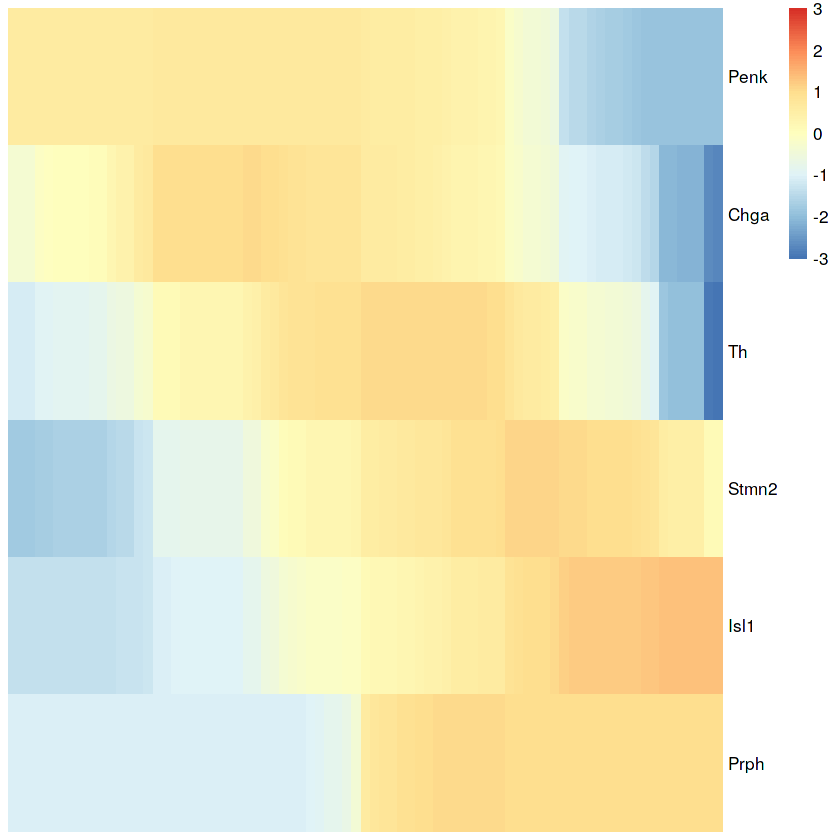

In [133]:
library(pheatmap)
library(viridis)
library(ggplot2)
Msel = log10(as.matrix(model_expectation))[,order(colData(cds_subset)$pseudotime)]
Msel=Msel[,5:(ncol(Msel))]
heatmap_matrix = na.omit(Msel)

ph <- pheatmap(heatmap_matrix, 
                 useRaster = T,
                 cluster_cols=FALSE, 
                 cluster_rows=F, 
                 show_rownames=T, 
                 show_colnames=F, 
                 #clustering_distance_rows=row_dist,
                 #clustering_method = ,
                 #cutree_rows=num_clusters,
                 silent=F,
                 filename=NA,
                 #breaks=bks,
                 border_color = NA,
                 #color=hmcols
               scale='row'#,
               #color=viridis(100)
              )

In [134]:
save_pheatmap_pdf(ph, "figures/fig2_medulla/heatmap_trajectory.mouse.medulla.bridge2.reorder1.pdf", 5, 5)

png 
  2